In [5]:
# import libraries/packages 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# import DataFrames

%store -r listing_property


In [ ]:
listing_property.info()

<AxesSubplot:xlabel='price'>

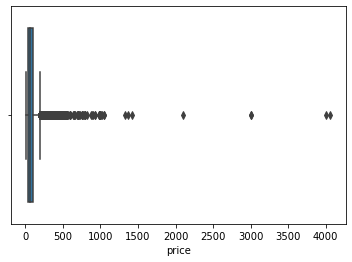

In [8]:
# to check extreme price 
sns.boxplot(x= listing_property['price'])


In [9]:

listing_property.price.agg(['mean','median','max','min'])

mean        86.029713
median      60.000000
max       4060.000000
min          8.000000
Name: price, dtype: float64

In [10]:
# check the price at 95th percentile
np.percentile(listing_property['price'], 95)

230.0

In [11]:
# take out 5% the highest price 
listing_property_t = listing_property.query('price <= 230')

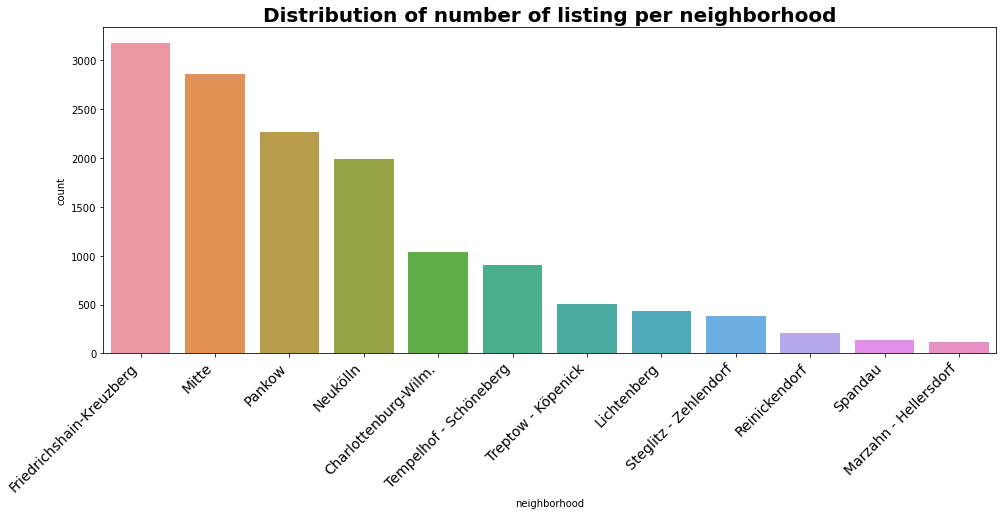

In [12]:
# plotting distribution 

# neighborhood 

neighborhood = listing_property_t.neighborhood.unique()

plt.figure(figsize=(16,6))
ax = sns.countplot(x = 'neighborhood', data= listing_property_t, order= listing_property_t['neighborhood'].value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation= 45, ha= 'right', fontsize= 14)

plt.title('Distribution of number of listing per neighborhood', fontsize= 20, fontweight= 'bold')
plt.show()
 

<AxesSubplot:xlabel='neighborhood'>

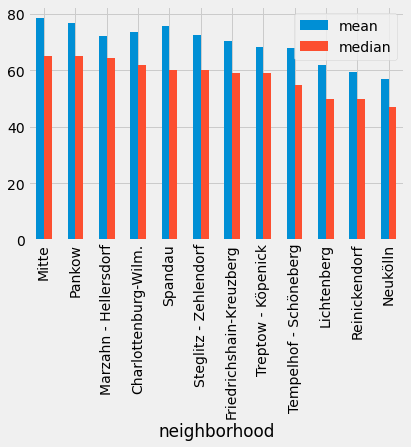

In [13]:
# compare mean and median across neighborhood 

plt.style.use("fivethirtyeight")

listing_property_t.groupby('neighborhood').price.agg(['mean','median']).sort_values(by= 'median', ascending= False).plot(kind= 'bar')

[Text(0, 0, 'Friedrichshain-Kreuzberg'),
 Text(1, 0, 'Mitte'),
 Text(2, 0, 'Tempelhof - Schöneberg'),
 Text(3, 0, 'Pankow'),
 Text(4, 0, 'Treptow - Köpenick'),
 Text(5, 0, 'Marzahn - Hellersdorf'),
 Text(6, 0, 'Charlottenburg-Wilm.'),
 Text(7, 0, 'Neukölln'),
 Text(8, 0, 'Steglitz - Zehlendorf'),
 Text(9, 0, 'Lichtenberg'),
 Text(10, 0, 'Spandau'),
 Text(11, 0, 'Reinickendorf')]

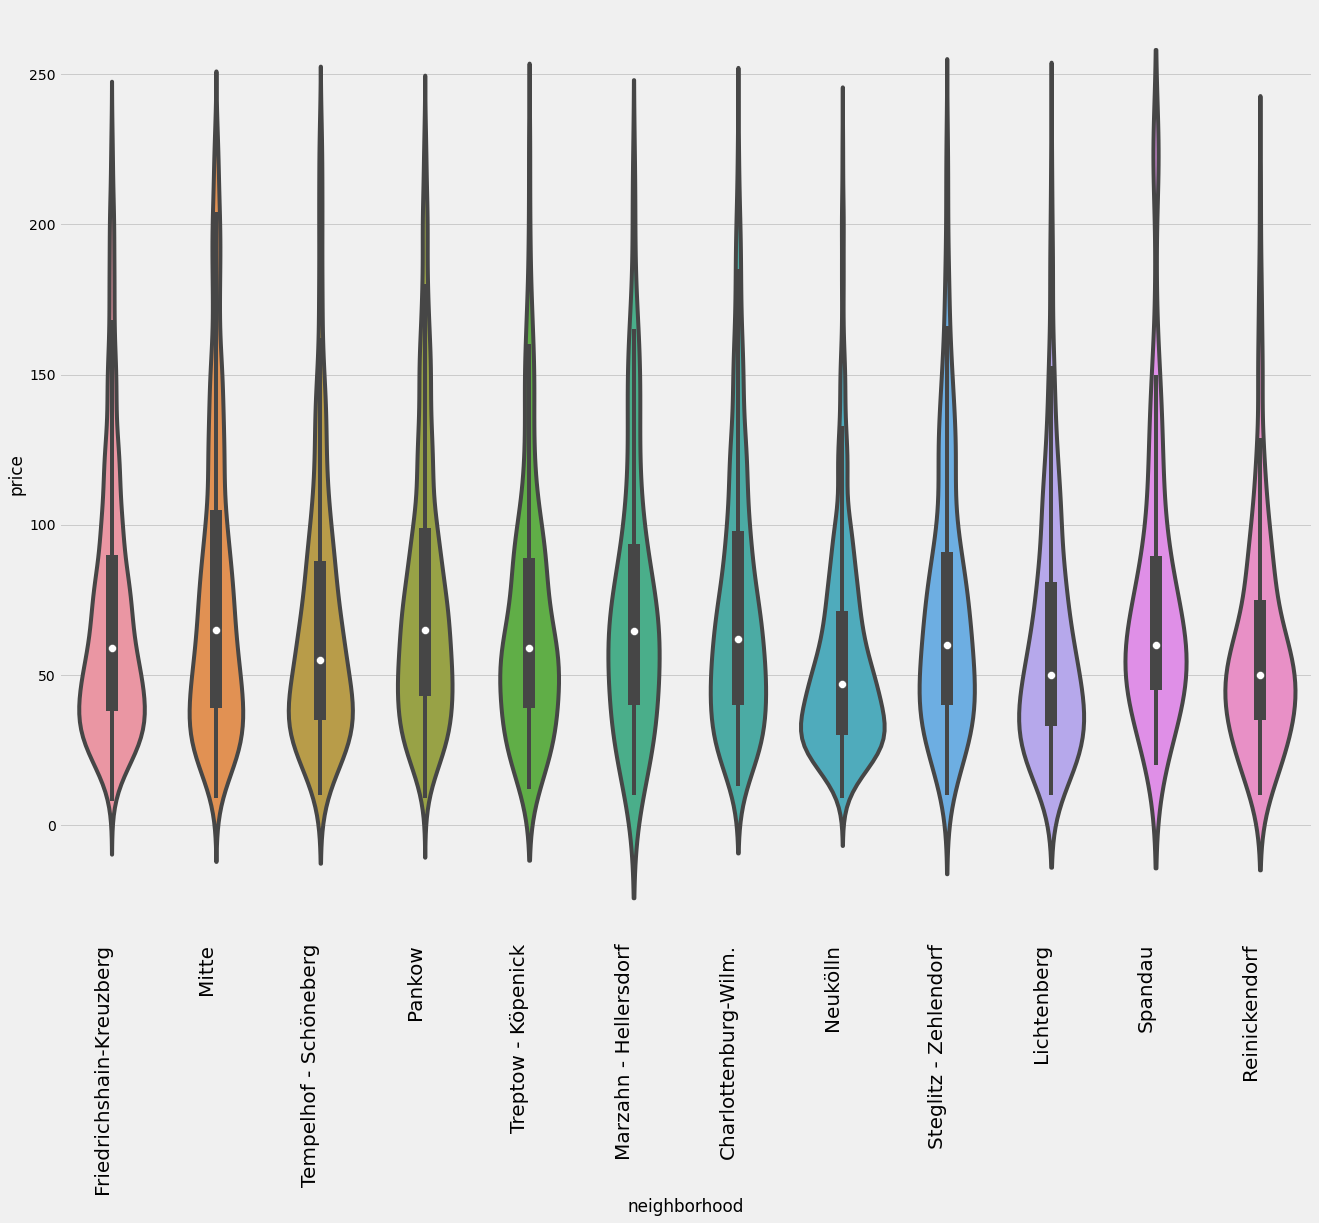

In [14]:
# violin plot for neighborhood 
plt.figure(figsize= (20,16))
ax = sns.violinplot(data= listing_property_t, x= 'neighborhood', y='price')

ax.set_xticklabels(ax.get_xticklabels(), rotation= 90, ha= 'right', fontsize= 20)

In [16]:
listing_property_t.pivot_table(values= 'price',
                                index= 'neighborhood',
                                aggfunc= ('count','mean','min','max', 'median')).sort_values(by='median', ascending= False)

,count,max,mean,median,min
neighborhood,,,,,
Mitte,2852,230.0,78.781557,65.0,9.0
Pankow,2263,230.0,76.971277,65.0,9.0
Marzahn - Hellersdorf,118,214.0,72.279661,64.5,10.0
Charlottenburg-Wilm.,1038,230.0,73.615607,62.0,13.0
Spandau,135,224.0,75.681481,60.0,20.0
Steglitz - Zehlendorf,384,229.0,72.653646,60.0,10.0
Friedrichshain-Kreuzberg,3176,230.0,70.526763,59.0,8.0
Treptow - Köpenick,504,230.0,68.164683,59.0,12.0
Tempelhof - Schöneberg,903,230.0,67.912514,55.0,10.0


In [17]:
listing_property_t.groupby('neighborhood').price.agg(['count','mean','median','max','min']).sort_values(by='median', ascending= False)

,count,mean,median,max,min
neighborhood,,,,,
Mitte,2852,78.781557,65.0,230.0,9.0
Pankow,2263,76.971277,65.0,230.0,9.0
Marzahn - Hellersdorf,118,72.279661,64.5,214.0,10.0
Charlottenburg-Wilm.,1038,73.615607,62.0,230.0,13.0
Spandau,135,75.681481,60.0,224.0,20.0
Steglitz - Zehlendorf,384,72.653646,60.0,229.0,10.0
Friedrichshain-Kreuzberg,3176,70.526763,59.0,230.0,8.0
Treptow - Köpenick,504,68.164683,59.0,230.0,12.0
Tempelhof - Schöneberg,903,67.912514,55.0,230.0,10.0


In [ ]:
# property type (nunique: 65)

property_type = listing_property_t.property_type.unique()

plt.figure(figsize=(16,6))
ax = sns.countplot(x = 'property_type', data= listing_property_t, order= listing_property_t['property_type'].value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation= 45, ha= 'right', fontsize= 10)

plt.title('Distribution of number of listing per property type', fontsize= 14, fontweight= 'bold')
plt.show()

In [ ]:
# find out top 10 most common property types 
sum(listing_property_t['property_type'].value_counts().nlargest(10))/listing_property_t['id'].count()

In [ ]:
listing_property_t['property_type'].value_counts().nlargest(10)

In [ ]:
# filter out the rest  

filt_ = listing_property_t['property_type'].isin(['Entire rental unit', 'Private room in rental unit', 'Entire condo', 'Entire serviced apartment', 'Entire loft','Private room in condo','Private room in home','Entire home','Room in hotel','Shared room in rental unit'])
top_10_property = listing_property_t[filt_]

top_10_property['property_type'].value_counts()

In [ ]:
# pivot table for price vs. property type 
top_10_property.pivot_table(values= 'price',
                                index= 'property_type',
                                aggfunc= ('count','mean','median','max')).sort_values(by='median', ascending= False).head(10)


In [ ]:
# compare mean and median across property types
plt.style.use("fivethirtyeight")
top_10_property.groupby('property_type').price.agg(['mean','median']).sort_values(by='median', ascending= False).plot(kind= 'bar')

In [ ]:
# violin plot - property type

plt.figure(figsize= (20,16))
ax = sns.violinplot(data= top_10_property, x= 'property_type', y='price')

ax.set_xticklabels(ax.get_xticklabels(), rotation= 90, ha= 'right', fontsize= 20)


In [ ]:
# room type

room_type = listing_property.room_type.unique()

plt.figure(figsize=(16,6))
ax = sns.countplot(x = 'room_type', data= listing_property, order=room_type)

ax.set_xticklabels(ax.get_xticklabels(), rotation= 0, ha= 'right', fontsize= 10)

plt.title('Distribution of number of listing per room type', fontsize= 14, fontweight= 'bold')
plt.show()

In [ ]:
listing_property_t.groupby('room_type').price.agg(['count','mean','median','max','min']).sort_values(by='median', ascending= False)

In [ ]:
# compare mean and median
plt.style.use("fivethirtyeight")
listing_property_t.groupby('room_type').price.agg(['mean','median']).sort_values(by= 'median', ascending= False).plot(kind= 'bar')

In [ ]:
# violin plot - room type

plt.figure(figsize= (20,16))
ax = sns.violinplot(data= listing_property_t, x= 'room_type', y='price')

ax.set_xticklabels(ax.get_xticklabels(), rotation= 90, fontsize= 20)

Text(0.5, 1.0, 'Distribution of number of listing per bath room type')

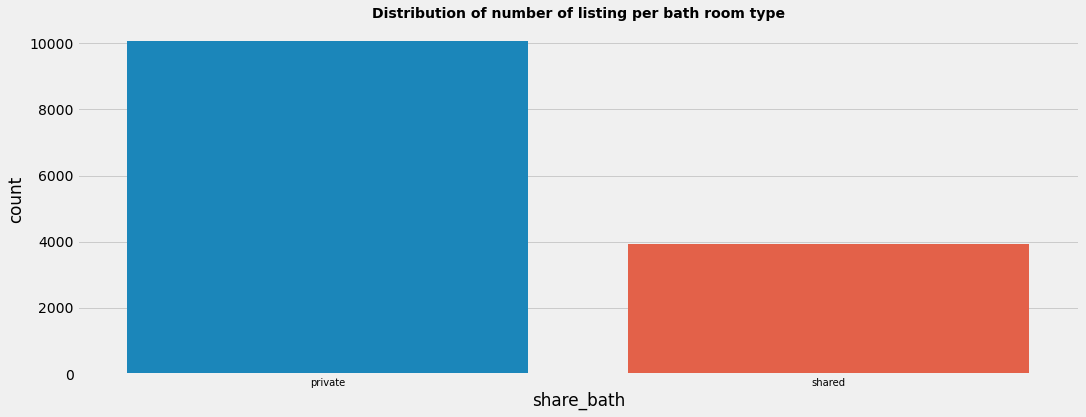

In [18]:
# shared bath 

shared_bath = ['private', 'shared']

plt.figure(figsize= (16,6))
ax = sns.countplot(x= 'share_bath', data= listing_property_t)
ax.set_xticklabels(shared_bath, fontsize= 10)

plt.title('Distribution of number of listing per bath room type', fontsize= 14, fontweight= 'bold')


[Text(0, 0, 'private'), Text(1, 0, 'shared')]

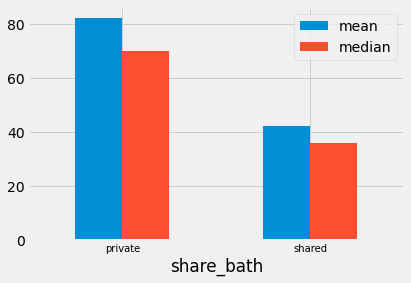

In [21]:
# compare mean and medians
plt.style.use("fivethirtyeight")
ax = listing_property_t.groupby('share_bath').price.agg(['mean','median']).plot(kind='bar')
ax.set_xticklabels(shared_bath, rotation= 0, fontsize= 10)


In [ ]:
listing_property_t.groupby('share_bath').price.agg(['count','mean','median','min','max'])

In [ ]:
# violin plot - share_bath

plt.figure(figsize= (20,16))
ax = sns.violinplot(data= listing_property_t, x= 'share_bath', y='price')

ax.set_xticklabels(shared_bath, fontsize= 20)

In [ ]:
# accommodates 

accommodates = listing_property_t.accommodates.unique()

plt.figure(figsize=(16,6))
ax = sns.countplot(x = 'accommodates', data= listing_property_t)

ax.set_xticklabels(ax.get_xticklabels(),ha= 'right', fontsize= 10)

plt.title('Distribution of number of listing per number of accommodates', fontsize= 14, fontweight= 'bold')
plt.show()


In [ ]:
listing_property_t.groupby('accommodates').price.agg(['count','mean','median','min','max'])

In [ ]:
# compare mean and median based on numbers of accommodates 
plt.style.use("fivethirtyeight")
listing_property_t.groupby('accommodates').price.agg(['mean','median']).plot(kind= 'bar')

In [ ]:
listing_property_t.plot.scatter(x='accommodates', y= 'price')

In [ ]:
# violin plot - accommodates

plt.figure(figsize= (20,16))
sns.violinplot(data= listing_property_t, x= 'accommodates', y='price')

<AxesSubplot:xlabel='bedrooms'>

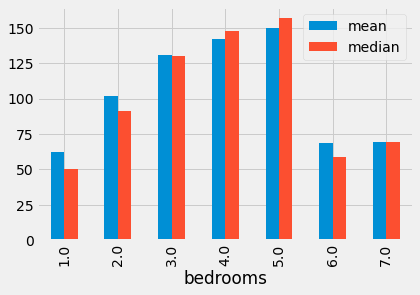

In [19]:
# number of bedrooms
plt.style.use("fivethirtyeight")
listing_property_t.groupby('bedrooms').price.agg(['mean','median']).plot(kind='bar')

Text(0.5, 1.0, 'Distribution of number of listing per number of bedrooms')

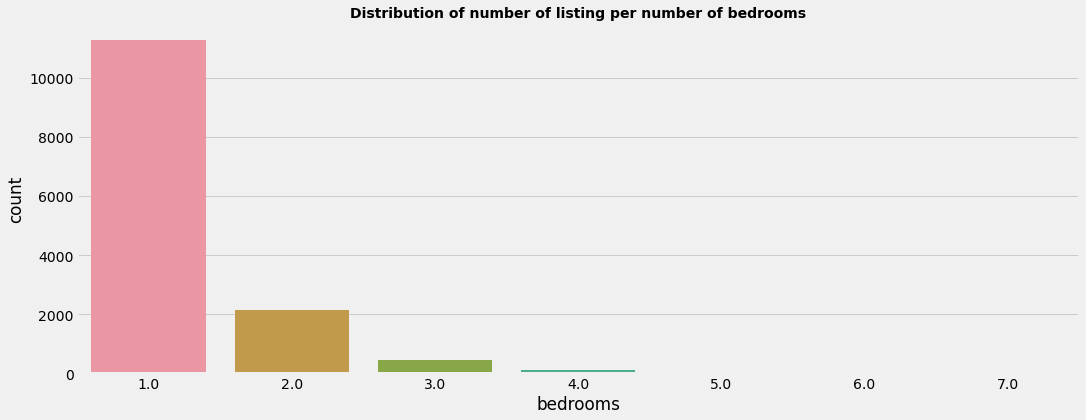

In [20]:
plt.figure(figsize= (16,6))
sns.countplot(x='bedrooms', data= listing_property_t)
ax.set_xticklabels(shared_bath, ha= 'right', fontsize= 10)

plt.title('Distribution of number of listing per number of bedrooms', fontsize= 14, fontweight= 'bold')

In [ ]:
# violin plot - bedrooms

plt.figure(figsize= (20,16))
sns.violinplot(data= listing_property_t, x= 'bedrooms', y='price')

In [ ]:
# number of beds

plt.figure(figsize= (16,6))
sns.countplot(x='beds', data= listing_property_t)
ax.set_xticklabels(shared_bath, ha= 'right', fontsize= 10)

plt.title('Distribution of number of listing per number of beds', fontsize= 14, fontweight= 'bold')

In [ ]:
# compare mean and median
plt.style.use("fivethirtyeight")
listing_property_t.groupby('beds').price.agg(['mean','median']).plot(kind= 'bar')

In [ ]:
# violin plot - number of beds

plt.figure(figsize= (20,16))
sns.violinplot(data= listing_property_t, x= 'beds', y='price')

In [22]:
plt.figure(figsize=(20,16))
ax = sns.boxplot(x= 'property_type', y='price', data= top_10_property,color='#99c2a2')
ax = sns.swarmplot(x= 'property_type', y='price', data= top_10_property,color='#7d0013')
plt.show()

NameError: name 'top_10_property' is not defined

<Figure size 1440x1152 with 0 Axes>

In [ ]:
# Statistical tests

# pip install researchpy 
import researchpy as rp
import scipy.stats as stats

In [ ]:
rp.summary_cont(listing_property_t['price'].groupby(listing_property_t['neighborhood']))

In [ ]:
# Oneway ANOVA test - neighborhood 

stats.f_oneway(listing_property_t['price'][listing_property_t['neighborhood'] == 'Charlottenburg-Wilm.'],
               listing_property_t['price'][listing_property_t['neighborhood'] == 'Friedrichshain-Kreuzberg'],
               listing_property_t['price'][listing_property_t['neighborhood'] == 'Lichtenberg'],
               listing_property_t['price'][listing_property_t['neighborhood'] == 'Marzahn - Hellersdorf'],
               listing_property_t['price'][listing_property_t['neighborhood'] == 'Mitte'],
               listing_property_t['price'][listing_property_t['neighborhood'] == 'Neukölln'],
               listing_property_t['price'][listing_property_t['neighborhood'] == 'Pankow'],
               listing_property_t['price'][listing_property_t['neighborhood'] == 'Reinickendorf'],
               listing_property_t['price'][listing_property_t['neighborhood'] == 'Spandau'],
               listing_property_t['price'][listing_property_t['neighborhood'] == 'Steglitz - Zehlendorf'],
               listing_property_t['price'][listing_property_t['neighborhood'] == 'Tempelhof - Schöneberg'],
               listing_property_t['price'][listing_property_t['neighborhood'] == 'Treptow - Köpenick'])
               

In [ ]:
rp.summary_cont(listing_property_t['price'].groupby(listing_property_t['room_type']))

In [ ]:

# Oneway ANOVA test - room_type


stats.f_oneway(listing_property_t['price'][listing_property_t['room_type'] == 'Entire home/apt'],
               listing_property_t['price'][listing_property_t['room_type'] == 'Hotel room'],
               listing_property_t['price'][listing_property_t['room_type'] == 'Private room'],
               listing_property_t['price'][listing_property_t['room_type'] == 'Shared room'])

In [ ]:
rp.summary_cont(listing_property_t['price'].groupby(listing_property_t['share_bath']))

In [ ]:
# Oneway ANOVA test - share_bath

stats.f_oneway(listing_property_t['price'][listing_property_t['share_bath'] == "0"],
                listing_property_t['price'][listing_property_t['share_bath'] == "1"])

In [ ]:
rp.summary_cont(top_10_property['price'].groupby(top_10_property['property_type']))

In [ ]:
# Oneway ANOVA test - property_type

stats.f_oneway(top_10_property['price'][top_10_property['property_type'] == "Entire condo"],
                top_10_property['price'][top_10_property['property_type'] == "Entire home"],
                top_10_property['price'][top_10_property['property_type'] == "Entire loft"],
                top_10_property['price'][top_10_property['property_type'] == "Entire rental unit"],
                top_10_property['price'][top_10_property['property_type'] == "Entire serviced apartment"],
                top_10_property['price'][top_10_property['property_type'] == "Private room in condo"],
                top_10_property['price'][top_10_property['property_type'] == "Private room in home"],
                top_10_property['price'][top_10_property['property_type'] == "Private room in rental unit"],
                top_10_property['price'][top_10_property['property_type'] == "Room in hotel"],
                top_10_property['price'][top_10_property['property_type'] == "Shared room in rental unit"])

In [ ]:
listing_property_t[['accommodates','bedrooms','price','beds']].corr(method= 'pearson')

In [ ]:
%store listing_property_t

### Summary of the analysis: what are the factors of airbnb rent price in Berlin in terms of property features

_Available property features: neighborhood, type of property, type of room, type of bathroom(shared vs. private), number of accommodates, number of bedrooms, number of beds_

+ 95% of the listing are priced under **230 euros** per night. Listings with an extreme price (more than 230 euros per night) are eliminated from this analysis. 
+ The median rent price in Berlin is **60 euros** per night. (min: 8 euros, max: 4060 euros)

#### Neighborhood 
+ **Friedrichshain - Kreuzberg** has the highest number of listings, followed by **Mitte** and **Pankow**. **Marzahn - Hellersdorf** has the least number of listings. 
+ **Mitte** and **Pankow** have the highest median rent price at 65 euros per night, followed by **Marzahn - Hellersdorf** at 64,5 euros per night. 
+ here's a significant difference of rent price between neighborhoods. 

#### Property Types

+ 10 property types account for 95% of the listing. Top three property types are **Entire rental unit, Private room in rental unit and Entire condo**. The uncommon types are **boat, tiny home, castle, entire villa, floor and tent etc..We will focus on top 10 property types for the analysis.
+ **Entire serviced apartment** has the highest median rent price at 145 euros per night, followed by **room in hotel** at 130 euros per night, **entire loft** at 109.5 euros per night, **entire home** at 96 euros and then **entire condo** at 95 euros.
+ There's a significant difference of rent price between property types. 

#### Room Types

+ Most common room types are **entire home or apartment** and **private room**.  
+ **Hotel room** has the highest median rent price at 160 euros per night, followed by **entire home or apartment** at 80 euros per night. 
+ There's a significant difference of rent price between room types. 

#### Bathroom types

+ 72% of the listings have a private bathroom. These have a higher median rent price at 70 euors per night. On the other hand, the median rent price of listings with a shared bath is 36 euros. 
+ There's a significant difference of rent price between bathroom types.

#### Accommodates, Bedrooms & Beds 

+ A weak correlation found between price and number of accommodates (0.52) 
+ A weak correlation found between price and number of bedrooms (0.41) 
+ A weak correlation found between price and number of beds (0.41) 

  